# Name:Padarthy Yagnesh Sai
# Question-3
3. Building a Classifier Using Decision Tree to predict the COVID-19 Severity. Print out
the Accuracy, classification error, sensitivity, specificity, precision, and Confusion
Matrix of Classification.

In [2]:
 # Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
 # Load the dataset
data = pd.read_csv('Cleaned-Data.csv')

In [7]:
 data.head(n=5)


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [8]:
 data.columns


Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

In [9]:
shape = data.shape
print(f"The shape of the data set is {shape}")

The shape of the data set is (316800, 27)


In [10]:
data.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [12]:
 data.isnull().sum()


Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

In [13]:
severity_columns = data.filter(like='Severity_').columns


In [14]:
data['Severity_None'].replace({1:'None',0:'No'},inplace =True)
data['Severity_Mild'].replace({1:'Mild',0:'No'},inplace =True)
data['Severity_Moderate'].replace({1:'Moderate',0:'No'},inplace =True)
data['Severity_Severe'].replace({1:'Severe',0:'No'},inplace =True)


In [15]:
data['Condition']=data[severity_columns].values.tolist()
data.head()


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country,Condition
0,1,1,1,1,1,0,1,1,1,1,...,0,Mild,No,No,No,0,0,1,China,"[Mild, No, No, No]"
1,1,1,1,1,1,0,1,1,1,1,...,0,Mild,No,No,No,0,1,0,China,"[Mild, No, No, No]"
2,1,1,1,1,1,0,1,1,1,1,...,0,Mild,No,No,No,1,0,0,China,"[Mild, No, No, No]"
3,1,1,1,1,1,0,1,1,1,1,...,0,No,Moderate,No,No,0,0,1,China,"[No, Moderate, No, No]"
4,1,1,1,1,1,0,1,1,1,1,...,0,No,Moderate,No,No,0,1,0,China,"[No, Moderate, No, No]"


In [18]:
def remove(lista):
    lista = set(lista)
    lista.discard("No")
    final = ''.join(lista)
    return final


In [19]:
data['Condition'] = data['Condition'].apply(remove)


In [20]:
 data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country,Condition
0,1,1,1,1,1,0,1,1,1,1,...,0,Mild,No,No,No,0,0,1,China,Mild
1,1,1,1,1,1,0,1,1,1,1,...,0,Mild,No,No,No,0,1,0,China,Mild
2,1,1,1,1,1,0,1,1,1,1,...,0,Mild,No,No,No,1,0,0,China,Mild
3,1,1,1,1,1,0,1,1,1,1,...,0,No,Moderate,No,No,0,0,1,China,Moderate
4,1,1,1,1,1,0,1,1,1,1,...,0,No,Moderate,No,No,0,1,0,China,Moderate


In [21]:
data.drop(severity_columns,axis=1,inplace=True)


In [22]:
data.drop(['Country'],axis=1,inplace=True)


In [23]:
le = preprocessing.LabelEncoder()
data['Condition'] = le.fit_transform(data['Condition'])


In [24]:
data.head()


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Condition
0,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,0
2,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,1,0,0,0
3,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,1
4,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1


In [27]:
X= data.drop(['Condition', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male', 'Gender_Transgender', 'Contact_Dont-Know', 'Contact_No', 'Contact_Yes' ],axis=1)
y= data['Condition']

In [28]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)


In [29]:
DTC=DecisionTreeClassifier()


In [30]:
DTC.fit(X_train,y_train)


DecisionTreeClassifier()

In [31]:
y_pred=DTC.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, classification_report
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Error rate
error_rate = 1 - accuracy
print("Error rate: ", error_rate)

# Precision
precision = precision_score(y_test, y_pred, average='macro')
print("Precision: ", precision)

# Recall rate
recall = recall_score(y_test, y_pred, average='macro')
print("Recall rate: ", recall)

# Classification Report
print("Classification Report\n")
print(classification_report(y_test, y_pred))


Confusion Matrix: 
[[5113 5220 6946 6617]
 [5632 4774 6898 6494]
 [5684 5212 6274 6499]
 [5641 5265 6879 5892]]
Accuracy:  0.23203914141414142
Error rate:  0.7679608585858586
Precision:  0.2320792001125723
Recall rate:  0.23212387741237847
Classification Report

              precision    recall  f1-score   support

           0       0.23      0.21      0.22     23896
           1       0.23      0.20      0.22     23798
           2       0.23      0.27      0.25     23669
           3       0.23      0.25      0.24     23677

    accuracy                           0.23     95040
   macro avg       0.23      0.23      0.23     95040
weighted avg       0.23      0.23      0.23     95040



In [33]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=10)

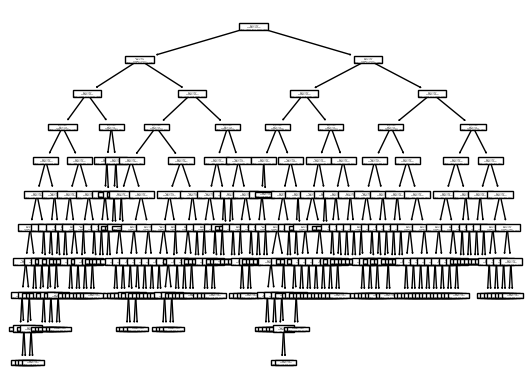

In [34]:
#Plotting Using Gini Method
plt.show(tree.plot_tree(DTC))


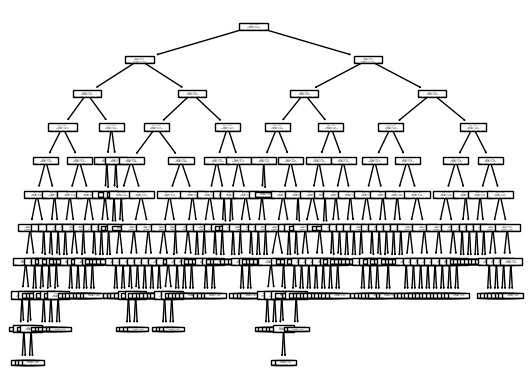

In [35]:
# Plotting Using Entropy Method
plt.show(tree.plot_tree(clf))